## saakshi mankar

# Task 2 : prediction using unsupervised ML

### From the given"iris" dataset predict the optimum no. of clusters & represent it visually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
iris_df=pd.read_csv(r"C:\Users\SAAKSHI MANKAR\Downloads\Iris.csv")


In [9]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris_df.describe()
#for statistical description

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
iris_df['Species'].value_counts()
#unique classes in the dataset

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [30]:
import seaborn as sns
sns.set_palette('husl')
iris= sns.load_dataset("iris")

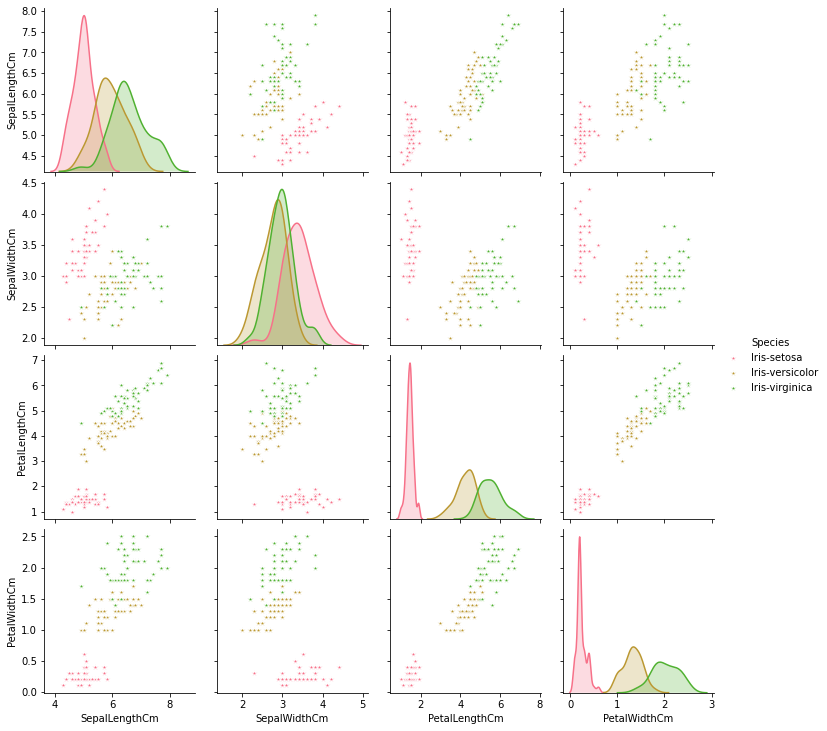

In [31]:
tmp=iris_df.drop('Id',axis=1)
s=sns.pairplot(tmp, hue='Species', markers='*')
plt.show()

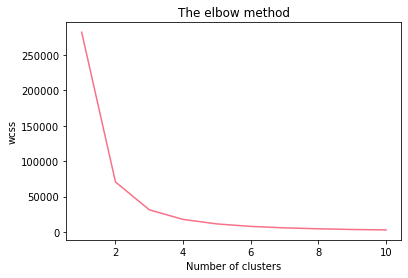

In [41]:
#Using elbow method 
#Finding the optimum no. of clusters for k-means classiication

x= iris_df.iloc[: , [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    Kmeans=KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init=10, random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

#plotting the result on a line graph
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
#from this we choose the no. of clusters as "4"
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init=10,random_state =0 )
y_kmeans = kmeans.fit_predict(x)

In [46]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# visualising the clusters
cl = pd.Series(kmeans.labels_)
iris_df['cluster']=cl
iris_df.iloc[:,:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [53]:
# visualising the clusters on the columns

plt.figure(figsize=(9,6))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],
            s=100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],
            s=100, c = 'green', label ="Iris-virginica')
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow', label ='centroids')
            
plt.legend()


SyntaxError: EOL while scanning string literal (<ipython-input-53-bed39777b634>, line 9)

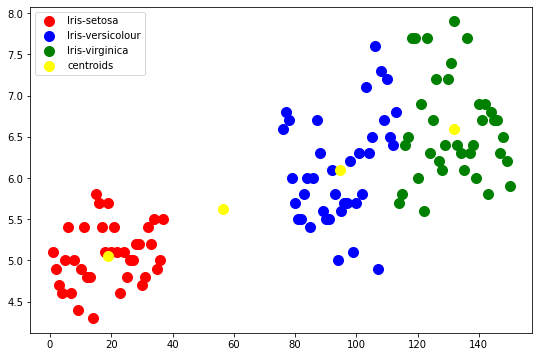

In [59]:
# visualising the clusters on the columns

plt.figure(figsize=(9,6))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],
            s=100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],
            s=100, c = 'green', label ="Iris-virginica")
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow', label ='centroids')
            
plt.legend()
